## Setup the environment

#### Adding the source code path

In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [2]:
import random

random.seed(10)

In [3]:
from DATA import MC_UNIFORM 
import numpy as np
import matplotlib.pyplot as plt

 ## Checking the Random Timeseries Generation 

Samples are randomly sampled from a uniform distribution, by defaut between [-0.5, 0.5], but such bound can be redefined. 
The resulting timeseries is then delayde by $\tau$ steps,

In [4]:
data = MC_UNIFORM(l=200, max_delay=100)
data.delay_timeseries(10)

X = data.X_DATA
Y = data.Y_DATA

In [5]:
size = X.shape[0]
print(X.shape, Y.shape)

torch.Size([290]) torch.Size([290])


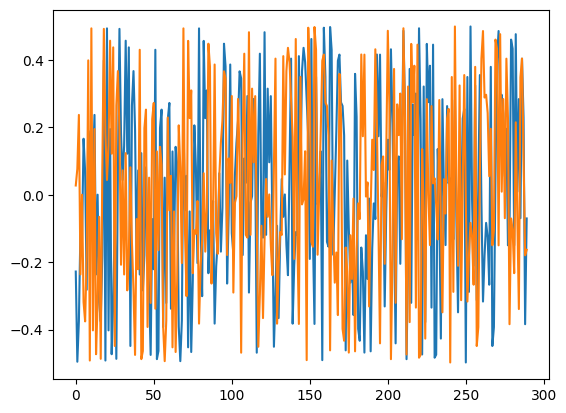

In [6]:
t = np.arange(0,size)
plt.plot(t, X, t, Y)
plt.show()

## Checking the Memory Capacity variation as the number of units changes


In [7]:
from ESN import Reservoir, EchoStateNetwork

In [8]:
def mean_mc(esn: EchoStateNetwork, rep):
    mc = 0
    for _ in range(rep):
        mc += esn.MemoryCapacity(l=1000, tau_max=50)

    return mc/rep

In [9]:
esn_5 = EchoStateNetwork(Reservoir(N = 5, sparsity=0, ro_rescale=0.95))
esn_10 = EchoStateNetwork(Reservoir(N = 10, sparsity=0, ro_rescale=0.95))
esn_25 = EchoStateNetwork(Reservoir(N = 25, sparsity=0, ro_rescale=0.95))
esn_50 = EchoStateNetwork(Reservoir(N = 50, sparsity=0, ro_rescale=0.95))

In [10]:
mean_mc(esn_5, 10)

tensor(20.8724)

In [11]:
mean_mc(esn_10, 10)

tensor(11.0550)

In [12]:
mean_mc(esn_25, 10)

In [ ]:
mean_mc(esn_50, 10)

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.44599e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.43604e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.43665e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Lo

tensor(2.8749)